In [1]:
import os
import shutil
import zipfile

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from matplotlib.pyplot import imshow
from pathlib import Path
from typing import List
from PIL import Image

In [2]:
zip_path = Path('tmp/cats-and-dogs.zip')
os.makedirs('tmp', exist_ok=True)

# NOTE: Baixa o dataset de gatos e cães do kaggle
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" -O 'tmp/cats-and-dogs.zip'

print("Download do dataset concluído!")

--2024-12-16 21:01:00--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.29.22.44, 2600:1406:bc00:1482::317f, 2600:1406:bc00:1481::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.29.22.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘tmp/cats-and-dogs.zip’

tmp/cats-and-dogs.z 100%[===================>] 786.67M  50.5MB/s    in 9.8s    

2024-12-16 21:01:10 (80.6 MB/s) - ‘tmp/cats-and-dogs.zip’ saved [824887076/824887076]

Download do dataset concluído!


In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('cats-and-dogs')

shutil.rmtree(zip_path.parent) # Exclui a pasta tmp e o .zip

In [4]:
CATS_DIR = Path('cats-and-dogs/PetImages/Cat')
DOGS_DIR = Path('cats-and-dogs/PetImages/Dog')

print(len(os.listdir(CATS_DIR)))  # 12501
print(len(os.listdir(DOGS_DIR)))  # 12501

12501
12501


In [5]:
def split_data(source: Path, train: Path, validation: Path, split_size: float) -> None:
  files: List = []

  for filename in os.listdir(source):
      file = Path(source / filename)

      if os.path.getsize(file) > 0 and file.suffix.lower() in ['.jpg', '.png']:
          try:
              # Read the image file
              img_bytes = tf.io.read_file(str(file))
              # Try to decode the image
              decoded_img = tf.io.decode_image(img_bytes)

              files.append(filename)

          except tf.errors.InvalidArgumentError as e:
              print(f"Found bad path {file}. So removing it.")
              os.remove(file)
      else:
          os.remove(file)
          print(f'{filename} is zero length or invalid. So removing it.')

  # Definindo o tamanho de treinamento e teste
  training_length = int(len(files) * split_size)
  validation_length = int(len(files) - training_length)

  # Embaralhando os dados
  shuffled_set = np.random.permutation(files)

  # Definindo o set de treinamento e teste
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[-validation_length:]

  # Cria os diretórios de destino se não existirem
  train.mkdir(parents=True, exist_ok=True)
  validation.mkdir(parents=True, exist_ok=True)

  # Copia as imagens para o path de treino
  for filename in training_set:
    this_file = source / filename
    destination = train / filename
    shutil.copyfile(this_file, destination)

  # Copia as imagens para o path de validação
  for filename in validation_set:
    this_file = source / filename
    destination = validation / filename
    shutil.copyfile(this_file, destination)

# Diretórios base
CATS_DIR = Path('cats-and-dogs/PetImages/Cat')
DOGS_DIR = Path('cats-and-dogs/PetImages/Dog')

# Diretórios de destino
CATS_TRAIN_DIR = Path('cats-and-dogs/train/cat')
CATS_VALIDATION_DIR = Path('cats-and-dogs/validation/cat')
DOGS_TRAIN_DIR = Path('cats-and-dogs/train/dog')
DOGS_VALIDATION_DIR = Path('cats-and-dogs/validation/dog')

# Define a divisão entre treino/teste
SPLIT_SIZE: float = 0.9

split_data(CATS_DIR, CATS_TRAIN_DIR, CATS_VALIDATION_DIR, SPLIT_SIZE)
split_data(DOGS_DIR, DOGS_TRAIN_DIR, DOGS_VALIDATION_DIR, SPLIT_SIZE)

assert len(os.listdir(CATS_DIR)) == len(os.listdir(CATS_TRAIN_DIR)) + len(os.listdir(CATS_VALIDATION_DIR))
assert len(os.listdir(DOGS_DIR)) == len(os.listdir(DOGS_TRAIN_DIR)) + len(os.listdir(DOGS_VALIDATION_DIR))

print('\nO dataset foi dividido entre treino/validação com sucesso!')

print(f'Qtd. de imagens em {CATS_DIR} = {len(os.listdir(CATS_DIR))}')                        # 12497
print(f'Qtd. de imagens em {CATS_TRAIN_DIR} = {len(os.listdir(CATS_TRAIN_DIR))}')            # 11247
print(f'Qtd. de imagens em {CATS_VALIDATION_DIR} = {len(os.listdir(CATS_VALIDATION_DIR))}')  # 1250

print(f'Qtd. de imagens em {DOGS_DIR} = {len(os.listdir(DOGS_DIR))}')                        # 12494
print(f'Qtd. de imagens em {DOGS_TRAIN_DIR} = {len(os.listdir(DOGS_TRAIN_DIR))}')            # 11244
print(f'Qtd. de imagens em {DOGS_VALIDATION_DIR} = {len(os.listdir(DOGS_VALIDATION_DIR))}')  # 1250

Thumbs.db is zero length or invalid. So removing it.
666.jpg is zero length or invalid. So removing it.
Found bad path cats-and-dogs/PetImages/Cat/4351.jpg. So removing it.
Found bad path cats-and-dogs/PetImages/Cat/10404.jpg. So removing it.
Found bad path cats-and-dogs/PetImages/Dog/2317.jpg. So removing it.
Found bad path cats-and-dogs/PetImages/Dog/11233.jpg. So removing it.
Found bad path cats-and-dogs/PetImages/Dog/11912.jpg. So removing it.
Thumbs.db is zero length or invalid. So removing it.
11702.jpg is zero length or invalid. So removing it.
Found bad path cats-and-dogs/PetImages/Dog/9500.jpg. So removing it.
Found bad path cats-and-dogs/PetImages/Dog/2494.jpg. So removing it.

O dataset foi dividido entre treino/validação com sucesso!
Qtd. de imagens em cats-and-dogs/PetImages/Cat = 12497
Qtd. de imagens em cats-and-dogs/train/cat = 11247
Qtd. de imagens em cats-and-dogs/validation/cat = 1250
Qtd. de imagens em cats-and-dogs/PetImages/Dog = 12494
Qtd. de imagens em cats-and-

In [6]:
TRAIN_DIR = Path('cats-and-dogs/train')
VALIDATION_DIR = Path('cats-and-dogs/validation')

IMG_SIZE = (160, 160)
BATCH_SIZE = 32

# Obtêm os datasets de treino e teste
train_dataset = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  VALIDATION_DIR,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE
)


Found 22491 files belonging to 2 classes.
Found 2500 files belonging to 2 classes.


In [7]:
class_names = train_dataset.class_names
print(f'As classes são: {class_names}')

As classes são: ['cat', 'dog']


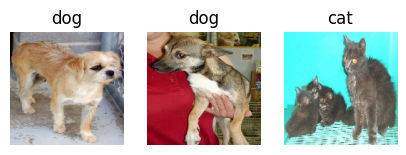

In [8]:
plt.figure(figsize=(5, 5))

for images, labels in train_dataset.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [10]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
])

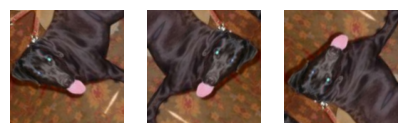

In [11]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(5, 5))
  first_image = image[0]

  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [12]:
val_batches = tf.data.experimental.cardinality(validation_dataset)

test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [13]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# base_model.summary()

In [15]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [16]:
# model.summary()

In [17]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [18]:
BASE_LEARNING_RATE = 0.00001
EPOCHS = 25

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=BASE_LEARNING_RATE),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print(f'trainable variables: {len(model.trainable_variables)}')

loss0, accuracy0, precision0, recall0  = model.evaluate(test_dataset)
print(f'initial loss: {loss0}')
print(f'initial accuracy: {accuracy0}')
print(f'initial precision: {precision0}')
print(f'initial recall: {recall0}')

trainable variables: 56
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5985 - loss: 0.7022 - precision: 0.5505 - recall: 0.4702
initial loss: 0.7275314927101135
initial accuracy: 0.5604166388511658
initial precision: 0.5464481115341187
initial recall: 0.4385964870452881


In [19]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset
)

Epoch 1/25
703/703 ━━━━━━━━━━━━━━━━━━━━ 67s 75ms/step - accuracy: 0.7826 - loss: 0.4373 - precision: 0.7867 - recall: 0.7684 - val_accuracy: 0.9713 - val_loss: 0.0854 - val_precision: 0.9831 - val_recall: 0.9602
Epoch 2/25
703/703 ━━━━━━━━━━━━━━━━━━━━ 77s 71ms/step - accuracy: 0.9204 - loss: 0.1919 - precision: 0.9179 - recall: 0.9218 - val_accuracy: 0.9772 - val_loss: 0.0691 - val_precision: 0.9775 - val_recall: 0.9775
Epoch 3/25
703/703 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.9298 - loss: 0.1724 - precision: 0.9246 - recall: 0.9348 - val_accuracy: 0.9797 - val_loss: 0.0650 - val_precision: 0.9748 - val_recall: 0.9853
Epoch 4/25
703/703 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.9376 - loss: 0.1510 - precision: 0.9354 - recall: 0.9391 - val_accuracy: 0.9792 - val_loss: 0.0690 - val_precision: 0.9728 - val_recall: 0.9862
Epoch 5/25
703/703 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.9454 - loss: 0.1362 - precision: 0.9409 - recall: 0.9499 - val_accuracy: 0.9792 - va

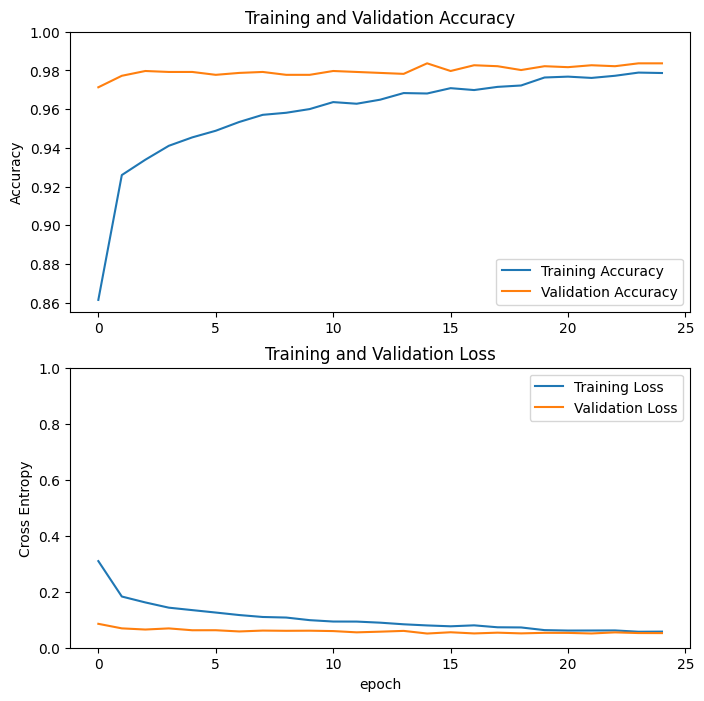

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
loss, accuracy, precision, recall = model.evaluate(test_dataset)

# Imprime as métricas
print("Perda:", loss)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9872 - loss: 0.0312 - precision: 0.9759 - recall: 0.9951
Perda: 0.03826117515563965
Acurácia: 0.987500011920929
Precisão: 0.9776785969734192
Recall: 0.9954545497894287


Predictions:
 [0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1]
Labels:
 [0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1]


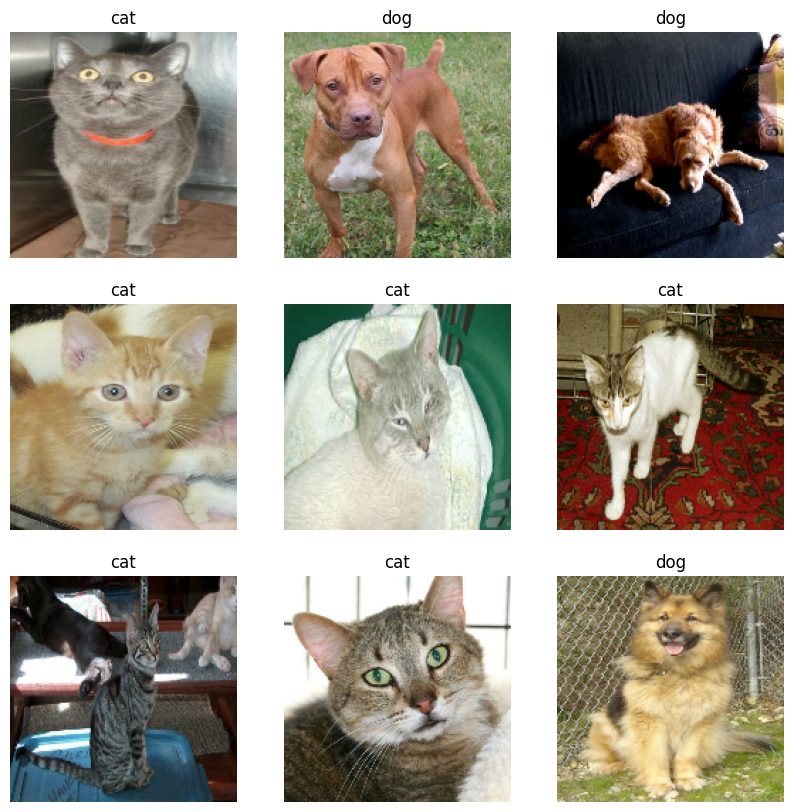

In [30]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")